# **Projek Machine Learning (Clustering)**

Nama : Fadhlurrahman Akbar Nasution

NIM  : 1301194258

Kelas : IF-43-09

## **Impoart Libarry Yang Digunakan**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import random
from sklearn.metrics import silhouette_score

## **Memasukan dataset yang akan digunakan**

In [2]:
df_train = pd.read_csv('Data/kendaraan_train_pca_clean.csv')
df_train

,Component_1,Component_2
0,-2.184836,0.329283
1,2.917861,0.161468
2,-2.089879,0.416098
3,2.702796,0.017162
4,-2.287977,0.263063
...,...,...
230562,-2.547640,0.081705
230563,-2.045069,0.446805
230564,-1.860918,0.611804
230565,0.318384,2.022060


In [3]:
df_train.dtypes

Component_1    float64
Component_2    float64
dtype: object

In [4]:
# Mengecek Total Data Pada Dataframe
print("Total Data :", len(df_train))

Total Data : 230567


## **Clustering**

In [5]:
#Metode Euclidean Untuk Menghitung jarak
def euclidean(x, centroid):
  return np.linalg.norm(x - centroid)

In [6]:
def kmeans(k, data,max_iterasion):
    #inisiasi centroid dengan memilihnya secara random
    centroid = {i: data[random.randint(0, len(data))] for i in range(k)}
    # untuk mendapatkan 
    sum_wcss = 0
    # inisiasi variable sameCentroid dengan false
    sameCentroid = False
    i = 0
    while(sameCentroid!=True) and (i < max_iterasion):
        #Mencopy centroid sebelumnya
        temp = centroid.copy()
        #Mengisi dictonary cluster yang setiap keynya memiliki array kosong sebanyak k
        cluster = {j: [] for j in range(k)}
        # Array untuk menyimpan nilai perhitungan jarak
        T = []

        #mencari nilai centroid terdekat dengan menggunakan metode euclidean 
        #dan mencari nilai minimum pada setiap distancenya yang akan dimasukan kedalam cluster
        for row in data:
            dist = [euclidean(row,centroid[x]) for x in centroid] 
            T.append(np.min(dist))#menyimpan nilai perhitungan jarak
            cluster[dist.index(min(dist))].append(row)

        #melakukan hasil tambah dari nilai perhitungan jarak yang telah diambil sebelumnya
        sum_wcss = sum(T)
        
        #Update centroid menggunakan mean
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl],axis = 0)
        
        #Melakukan pengecekan apakah centroid telah mencapai nilai yang maksimal / konvergen
        for key in cluster.keys():
            if(temp.get(key)==centroid.get(key))[0]:
                sameCentroid = True
                break
        i+=1
    
    return centroid,cluster,sum_wcss

## **FUNGSI MAIN** 

Centroid Cluster 2=
{0: array([-1.46198137, -0.14099201]), 1: array([1.49853732, 0.14451743])}



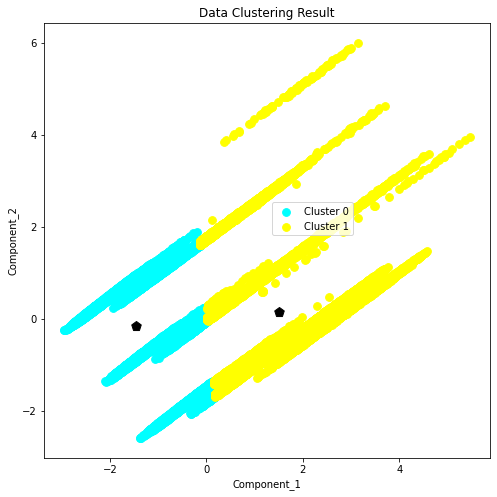

Centroid Cluster 3=
{0: array([1.74225129, 0.54276824]), 1: array([ 0.22428224, -1.3790762 ]), 2: array([-1.73351235,  0.37871968])}



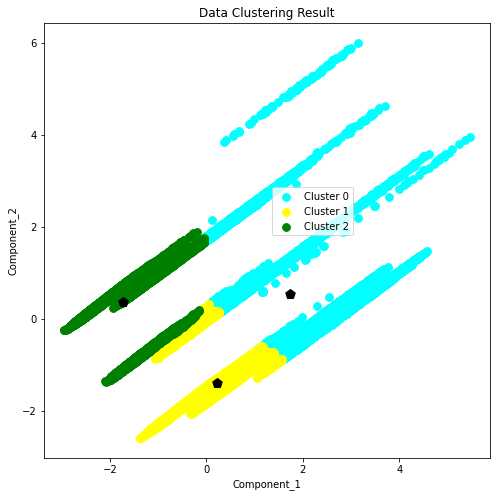

Centroid Cluster 4=
{0: array([-1.90828959,  0.23946562]), 1: array([0.50333514, 1.65177677]), 2: array([ 2.04439254, -0.24612864]), 3: array([-0.02597628, -1.53368824])}



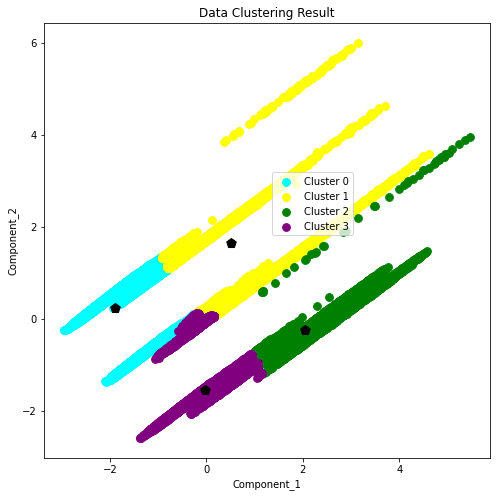

Centroid Cluster 5=
{0: array([-2.0300467 ,  0.44682106]), 1: array([ 1.08899816, -0.77141402]), 2: array([-0.77763646, -1.47820431]), 3: array([0.37895995, 1.77035774]), 4: array([2.44340364, 0.16098445])}



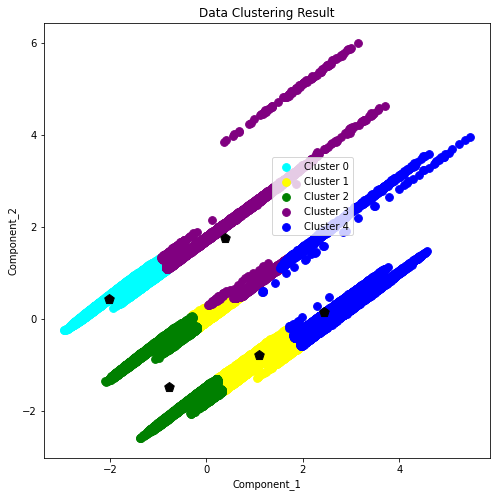

Centroid Cluster 6=
{0: array([-2.09767266,  0.4094795 ]), 1: array([-0.05094604, -1.6470801 ]), 2: array([1.02671235, 2.03095781]), 3: array([-1.25769862, -0.73259707]), 4: array([-0.24571949,  1.11297007]), 5: array([ 2.02079791, -0.26418944])}



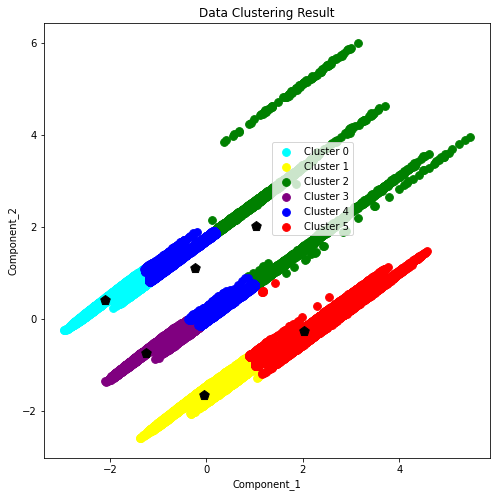

Centroid Cluster 7=
{0: array([2.89858575, 0.65055132]), 1: array([0.38613998, 1.77003953]), 2: array([ 1.23858309, -0.69377912]), 3: array([ 0.40748974, -1.09436554]), 4: array([-2.02926345,  0.44726062]), 5: array([-0.8759754 , -1.50254483]), 6: array([ 2.12376297, -0.17828056])}



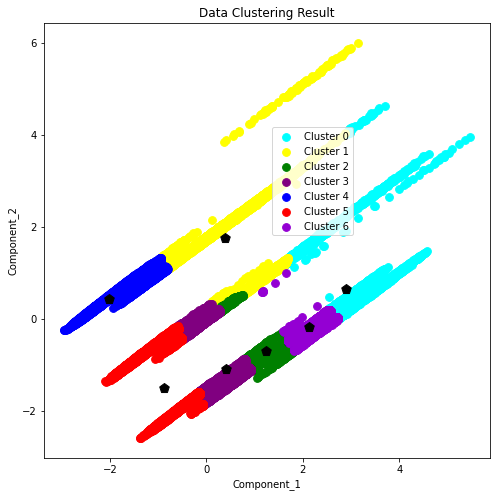

Centroid Cluster 8=
{0: array([-0.50487902,  1.38131225]), 1: array([0.79772246, 0.59955624]), 2: array([ 1.20280034, -0.85473463]), 3: array([-2.10699072,  0.40384736]), 4: array([0.94568584, 2.28671768]), 5: array([-1.26275975, -0.73480265]), 6: array([2.46807925, 0.05720156]), 7: array([-0.46214014, -1.8844634 ])}



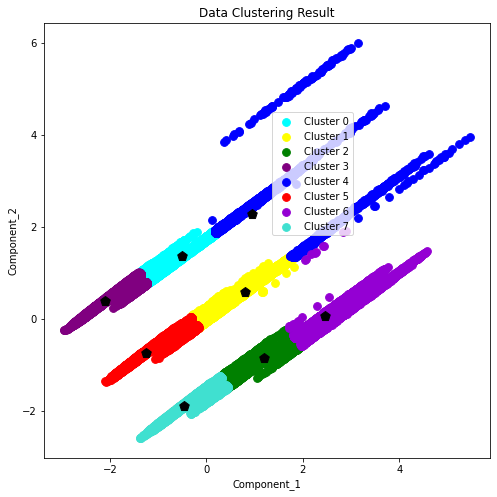

In [7]:
# inisiasi array dari hasil wcss untuk elbow method
jumlah_elbow = []
# Merubah DataFrame Menjadi Numpy Array
data = df_train.to_numpy()

max_iterasion = 100
k = range(2,9)
for i in k:
    # Memanggil Fungsi kmeans Yang Akan Mengembalikan Nilai Centroid Dan Cluster
    centroid, cluster,wcss = kmeans(i, data, max_iterasion)
    print(f'Centroid Cluster {i}=\n{centroid}\n')

    jumlah_elbow.append(wcss) 
    df = []
    for key in cluster.keys():
        for c in cluster.get(key):
            df.append((c[0], c[1], key))
                
    # Convert to dataframe
    df = pd.DataFrame(df)
    df.columns = ['Component_1','Component_2','Cluster']
    #visualisasi data yang dugasukjab
    plt.figure(figsize=(8,8))
    color = ['Cyan','Yellow','Green','Purple','Blue','Red','darkviolet','turquoise','darkorange','lightgreen']
    plt.title('Data Clustering Result')
    for j in range(i):
        #visalisasi cluster component_1 dan component_2
        plt.scatter(
            df['Component_1'][df['Cluster']==j],
            df['Component_2'][df['Cluster']==j],
            c=color[j],s=60,label=f'Cluster {j}'
        )
        #Memvisualisasikan letak centroid
        plt.scatter(centroid[j][0], centroid[j][1], color='k', marker='p',s=100)
    plt.legend(loc = 'best',bbox_to_anchor=(0.5, 0.5))
    plt.xlabel("Component_1")
    plt.ylabel("Component_2")
    plt.show()
    

## **IMPLEMENTASI ELBOW METHOD**

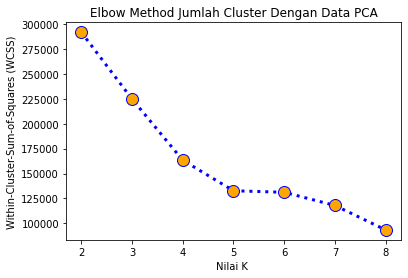

In [8]:
number_clusters = range(2,9)
plt.plot(number_clusters,jumlah_elbow,color='blue', linewidth=3,linestyle='dotted', marker='o', markersize=12, markerfacecolor='orange')
plt.title('Elbow Method Jumlah Cluster Dengan Data PCA')
plt.xlabel('Nilai K ')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.show()

## **IMPLEMENTASI ELBOW METHOD DENGAN MENGGUNAKAN LIBRARY KMEANS**

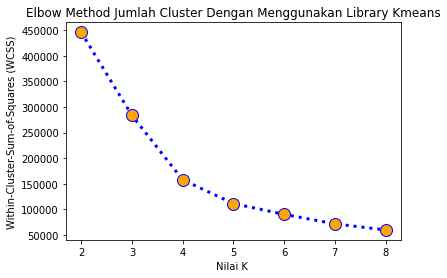

In [9]:

distance = []
K = range(2,9)
for i in K:
    km = KMeans(n_clusters=i)
    km = km.fit(df_train)
    distance.append(km.inertia_)

plt.plot(K, distance, color='blue', linewidth=3,linestyle='dotted', marker='o', markersize=12, markerfacecolor='orange')
plt.title('Elbow Method Jumlah Cluster Dengan Menggunakan Library Kmeans')
plt.xlabel('Nilai K ')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.show()